In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
from pandas_datareader import data
from datetime import datetime

In [4]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [6]:
for tech in tech_list:
 globals()[tech] = data.get_data_yahoo(tech, start, end)

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,156.930318,153.398968,155.075357,155.263849,8.883695e+07,154.786610
std,14.344764,13.723100,14.100912,13.987362,2.679411e+07,14.096246
min,124.849998,123.129997,124.070000,123.540001,4.100000e+07,122.838203
25%,147.052502,144.419998,145.514999,145.857502,6.955788e+07,145.246212
50%,154.675003,150.510002,152.235001,152.284996,8.489835e+07,151.900696
75%,169.727493,165.512501,167.607498,166.727497,1.035052e+08,166.482895
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-06-01 to 2022-05-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

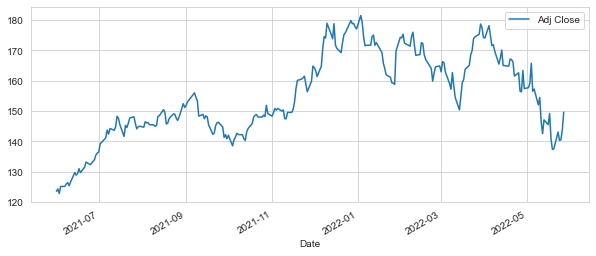

In [9]:
AAPL['Adj Close'].plot(legend = True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

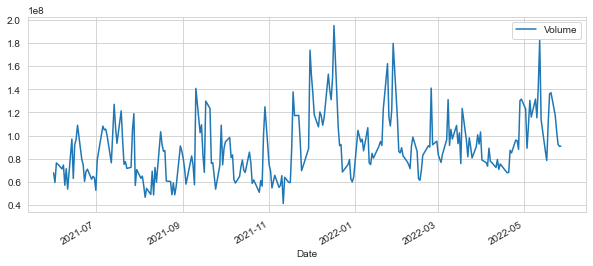

In [10]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

#moving averages

In [11]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    AAPL[column_name]= AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

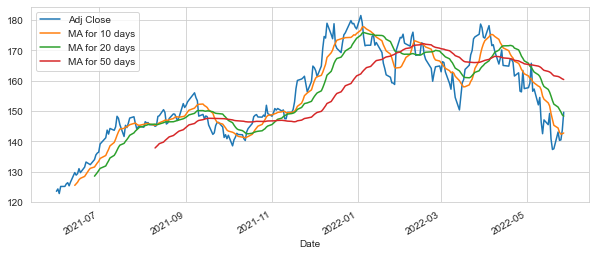

In [12]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10,4) )

<AxesSubplot:xlabel='Date'>

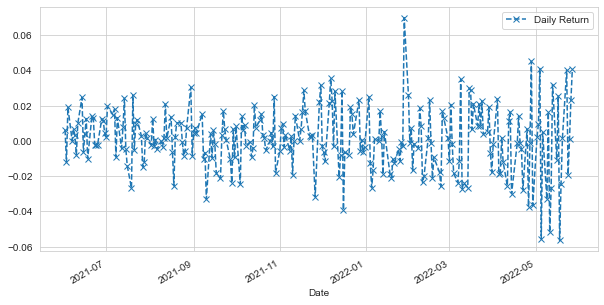

In [13]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (10, 5), linestyle ='--', marker = 'x', legend = True)

<AxesSubplot:>

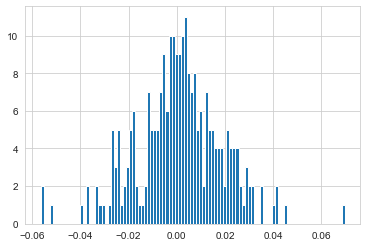

In [14]:
AAPL['Daily Return'].hist(bins= 100)

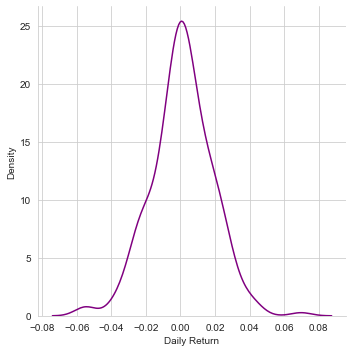

In [15]:
sns.displot(AAPL['Daily Return'].dropna(),kind = 'kde', color = 'purple')

In [16]:
ffd = data.get_data_yahoo(tech_list, start, end)['Adj Close']

In [17]:
ffd

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-01,123.573997,2429.810059,245.396194,3218.649902
2021-06-02,124.349556,2421.280029,245.297028,3233.989990
2021-06-03,122.838196,2404.610107,243.719894,3187.010010
2021-06-04,125.174850,2451.760010,248.758743,3206.219971
2021-06-07,125.184792,2466.090088,251.754303,3198.010010
...,...,...,...,...
2022-05-23,143.110001,2233.330078,260.649994,2151.139893
2022-05-24,140.360001,2118.520020,259.619995,2082.000000
2022-05-25,140.520004,2116.790039,262.519989,2135.500000


In [18]:
techrets = ffd.pct_change()

In [19]:
techrets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-01,NaN,NaN,NaN,NaN
2021-06-02,0.006276,-0.003511,-0.000404,0.004766
2021-06-03,-0.012154,-0.006885,-0.006429,-0.014527
2021-06-04,0.019022,0.019608,0.020675,0.006028
2021-06-07,0.000079,0.005845,0.012042,-0.002561


In [20]:
techrets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-06-01 to 2022-05-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    251 non-null    float64
 1   GOOG    251 non-null    float64
 2   MSFT    251 non-null    float64
 3   AMZN    251 non-null    float64
dtypes: float64(4)
memory usage: 9.8 KB


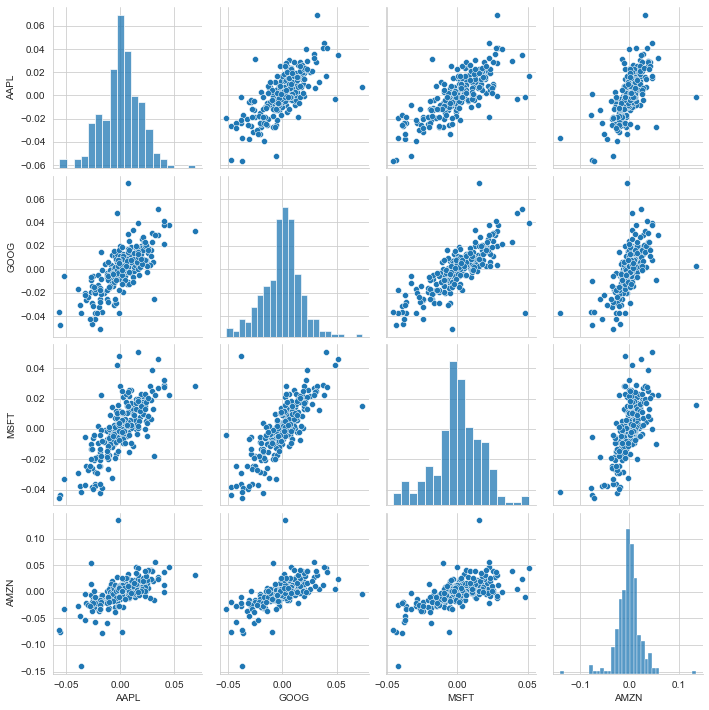

In [21]:
sns.pairplot(techrets.dropna())

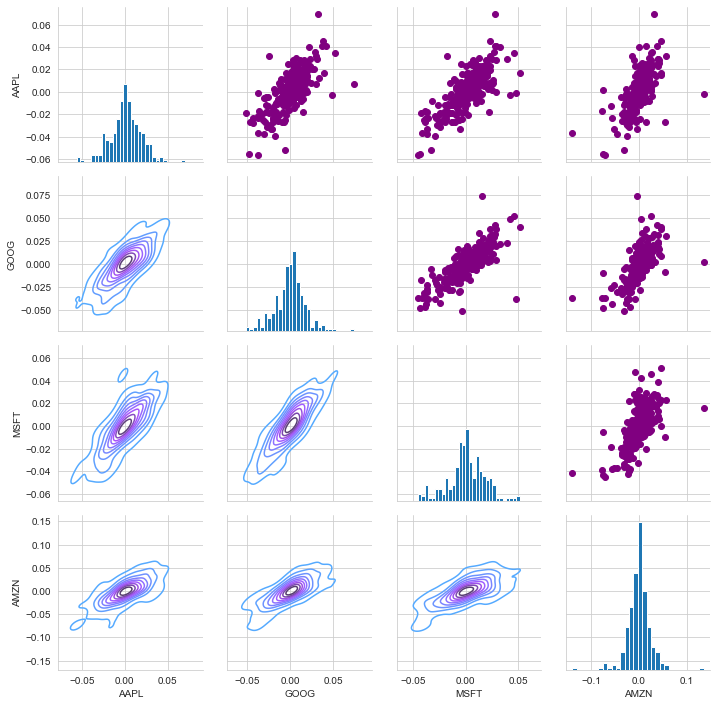

In [22]:
fig_grid = sns.PairGrid(techrets.dropna())
fig_grid.map_upper(plt.scatter, color='purple')
fig_grid.map_lower(sns.kdeplot, cmap ='cool_d')
fig_grid.map_diag(plt.hist, bins = 30)

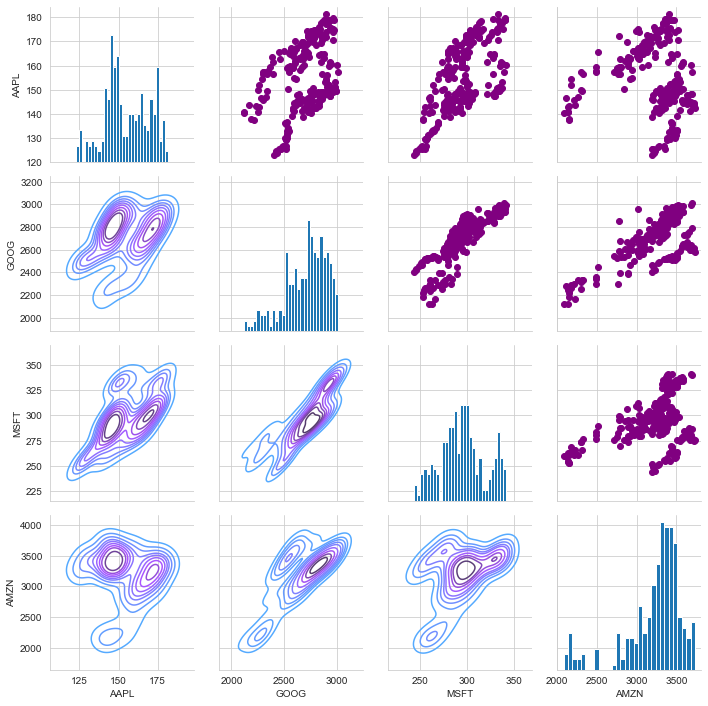

In [23]:
fig_grid = sns.PairGrid(ffd.dropna())
fig_grid.map_upper(plt.scatter, color='purple')
fig_grid.map_lower(sns.kdeplot, cmap ='cool_d')
fig_grid.map_diag(plt.hist, bins = 30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

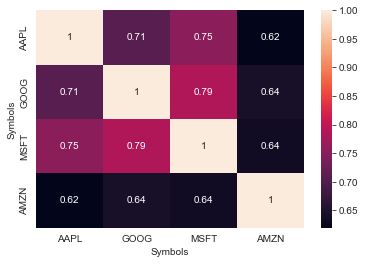

In [24]:
techrets_df= techrets.corr()
sns.heatmap(techrets_df.dropna(), annot = True)


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

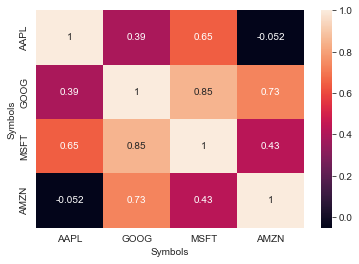

In [25]:
ffd_df= ffd.corr()
sns.heatmap(ffd_df.dropna(), annot = True)

Text(0, 0.5, 'Risk')

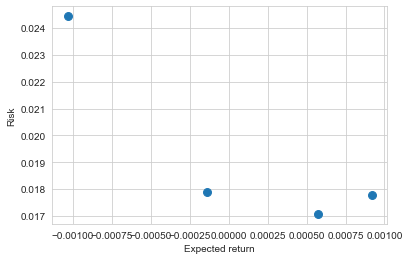

In [26]:
rets = techrets.dropna()
area = np.pi*20
plt.scatter(x=rets.mean(), y=rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')






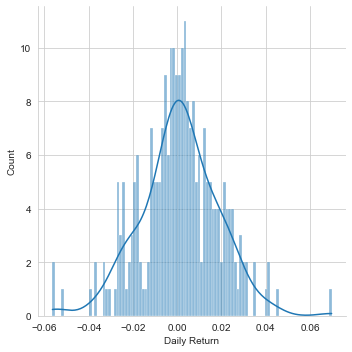

In [28]:
sns.displot(AAPL['Daily Return'].dropna(), kind ='hist', kde = True, bins = 100)

In [29]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-02,0.006276,-0.003511,-0.000404,0.004766
2021-06-03,-0.012154,-0.006885,-0.006429,-0.014527
2021-06-04,0.019022,0.019608,0.020675,0.006028
2021-06-07,0.000079,0.005845,0.012042,-0.002561
2021-06-08,0.006672,0.006796,-0.004886,0.020669


In [35]:
#5% one day value at risk
rets['AAPL'].quantile(0.05)

-0.02690425946855185

95% of the time your max daily loss will not exceed 2.69% for apple stock

In [51]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [52]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma *np.sqrt(dt))
        drift[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
    return price

In [53]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-01,2437.970947,2404.879883,2422.000000,2429.810059,958300,2429.810059
2021-06-02,2442.000000,2404.199951,2435.310059,2421.280029,857900,2421.280029
2021-06-03,2409.745117,2382.830078,2395.020020,2404.610107,917300,2404.610107
2021-06-04,2453.858887,2417.770020,2422.520020,2451.760010,1297400,2451.760010
2021-06-07,2468.000000,2441.072998,2451.320068,2466.090088,1192500,2466.090088


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

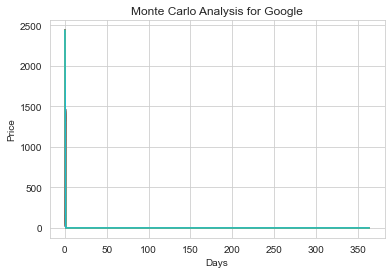

In [62]:
start_price =2437.970947
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')